# Get Test Trader Data

In [1]:
from Data_Operation import Preparation

In [2]:
data_set = Preparation(folder_path='Test_trader_data')
data_set.Get

,Time,Type,Volume,Symbol,Price,S/L,T/P,Time,Price,Commission,Swap,Profit,Comment
0,2021-02-01 00:32:36,Balance,0.00,0,0.00000,0,0.00000,0,0.00000,0.00,0.0,10000.00,Deposit
1,2021-02-01 00:35:18,Balance,0.00,0,0.00000,0,0.00000,0,0.00000,0.00,0.0,14000.00,Deposit
2,2021-02-01 02:40:01,Sell,0.07,EURUSD,1.21305,0,1.21196,2021-02-01 09:03:27,1.21194,-0.56,0.0,7.77,[tp]
3,2021-02-01 09:05:02,Sell,0.07,EURUSD,1.21239,0,1.21131,2021-02-01 09:29:44,1.21131,-0.56,0.0,7.56,[tp]
4,2021-02-01 09:30:02,Sell,0.07,EURUSD,1.21137,0,1.21029,2021-02-01 09:50:39,1.21026,-0.56,0.0,7.77,[tp]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,2022-04-08 10:15:02,Buy,0.06,EURUSD,1.08751,0,1.08723,2022-04-08 11:04:46,1.08726,-0.48,0.0,-1.50,[tp]
6685,2022-04-08 10:35:02,Buy,0.12,EURUSD,1.08647,0,1.08723,2022-04-08 11:04:46,1.08726,-0.96,0.0,9.48,[tp]
6686,2022-04-08 09:45:01,Buy,0.06,AUDNZD,1.08797,0,1.08855,2022-04-08 11:43:14,1.08856,-0.48,0.0,2.46,[tp]
6687,2022-04-08 11:05:02,Buy,0.06,EURUSD,1.08732,0,1.08840,2022-04-08 12:09:33,1.08662,-0.48,0.0,-4.20,0


# Get Market Data 

In [3]:
from Data_Operation import Market_Data , OpenClose_data

In [4]:
ETHUSD = Market_Data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
    Interval="1H"
).send_post_request

In [5]:
ETHUSD

,time,open,high,low,close,volume
0,2022-01-03 05:42:00,3820.48,3823.2,3818.70,3823.20,13.5813
1,2022-01-03 05:43:00,3822.70,3822.7,3819.80,3819.90,22.3056
2,2022-01-03 05:44:00,3819.80,3819.8,3816.90,3816.90,10.0883
3,2022-01-03 05:45:00,3817.10,3819.3,3817.10,3819.30,3.9636
4,2022-01-03 05:46:00,3819.30,3819.3,3818.60,3818.60,23.0657
...,...,...,...,...,...,...
43663,2022-01-19 12:15:00,3120.00,3122.0,3119.07,3119.07,15.0836
43664,2022-01-19 12:16:00,3118.20,3120.4,3118.10,3120.40,1.2899
43665,2022-01-19 12:17:00,3119.90,3120.2,3119.90,3120.20,0.6593
43666,2022-01-19 12:18:00,3121.30,3121.3,3120.40,3120.40,0.4631


In [6]:
open_close = OpenClose_data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
).send_post_request

In [7]:
open_close

,candlewindow,utctime,close
0,-50% (start),2021-12-16 13:23:00,4041.80
1,-40% (start),2021-12-19 14:37:00,3951.50
2,-30% (start),2021-12-22 15:48:00,4002.72
3,-20% (start),2021-12-25 18:56:00,4084.00
4,-10% (start),2021-12-28 22:10:00,3814.60
5,(start),2022-01-01 00:00:00,3685.00
6,+10% (start),2022-01-04 06:53:00,3751.31
7,+20% (start),2022-01-07 09:49:00,3255.20
8,+30% (start),2022-01-10 11:08:00,3115.70
9,+40% (start),2022-01-13 13:56:00,3368.60


# Duration

In [6]:
from Evaluation_Attributes import Duration

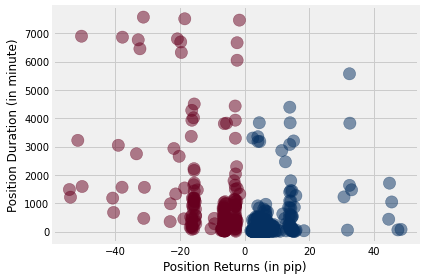

In [7]:
data = data_set.Get
Duration(data).plot

In [8]:
Duration(data).Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,41.12,4.337330
1,135.00,4.594043
2,98.28,-15.770021
3,86.87,-2.953095
4,62.83,13.921646
...,...,...
930,1.87,15.230895
931,138.38,4.504587
932,3.45,4.509853
933,111.38,4.418954
